<a href="https://colab.research.google.com/github/coderAllDay/TwitterSentimentAnalysis/blob/master/NaiveBaye's.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import matplotlib 
%matplotlib inline
%config InlineBackend.figure_format = 'svg'
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import numpy as np
import pandas as pd
import string

from collections import defaultdict
import seaborn as sns
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer

import joblib
import pickle as pkl

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
def open_file(filename):
  with open(filename, 'r') as f:
    data = f.readlines()
  return data

In [ ]:
data_raw = dict()
data_raw['sk'] = open_file('/content/slovak.txt')
data_raw['cs'] = open_file('/content/czech.txt')
data_raw['en'] = open_file('/content/english.txt')


In [ ]:
data_raw['en']

['While classified in the hound group or scent hound group in the United States and Great Britain, the breed has its own group in the countries which belong to the Fédération Cynologique Internationale (World Canine Federation). Many dachshunds, especially the wire-haired subtype, may exhibit behavior and appearance that are similar to that of the terrier group of dogs.']

In [ ]:
def show_statistics(data):
  for language, sentences in data.items():
    number_of_sentences = 0
    number_of_words = 0
    number_of_unique_words = 0
    sample_extract = ''

    word_list = ' '.join(sentences).split()

    number_of_sentences = len(sentences)
    number_of_words = len(word_list)
    number_of_unique_words = len(set(word_list))
    sample_extract = ' '.join(sentences[0].split()[0:7])
    print(f'Language : {language}')
    print('-----------------------')
    print(f'Number of Sentences\t:\t {number_of_sentences}')
    print(f'Number of words\t\t:\t {number_of_words}')
    print(f'Number of Unique Words\t:\t {number_of_unique_words}')
    print(f'Number of Sample Extract\t:\t {sample_extract}.......\n')


In [ ]:
show_statistics(data_raw)

Language : sk
-----------------------
Number of Sentences	:	 1
Number of words		:	 62
Number of Unique Words	:	 58
Number of Sample Extract	:	 Mnohí \u013eudia, ktorí vidia na ulici jazve\u010díka.......

Language : cs
-----------------------
Number of Sentences	:	 1
Number of words		:	 61
Number of Unique Words	:	 51
Number of Sample Extract	:	 ﻿Ãpln\u011b prvnÃ­ zmÃ­nky o psech podobnÃ½ch dne\u0161nÃ­m.......

Language : en
-----------------------
Number of Sentences	:	 1
Number of words		:	 58
Number of Unique Words	:	 42
Number of Sample Extract	:	 While classified in the hound group or.......



In [ ]:
def preprocess(text):
  preprocessed_text = text
  preprocessed_text = text.lower().replace('-', ' ')
  translation_table = str.maketrans('\n', ' ', string.punctuation + string.digits)
  preprocessed_text = preprocessed_text.translate(translation_table)
  return preprocessed_text

In [ ]:
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [ ]:
data_preprocessed = {k : [preprocess(sentence) for sentence in v] for k, v in data_raw.items()}

In [ ]:
print('Raw Data')
show_statistics(data_raw)

print('\nPreprocessed')
show_statistics(data_preprocessed)

Raw Data
Language : sk
-----------------------
Number of Sentences	:	 1
Number of words		:	 62
Number of Unique Words	:	 58
Number of Sample Extract	:	 Mnohí \u013eudia, ktorí vidia na ulici jazve\u010díka.......

Language : cs
-----------------------
Number of Sentences	:	 1
Number of words		:	 61
Number of Unique Words	:	 51
Number of Sample Extract	:	 ﻿Ãpln\u011b prvnÃ­ zmÃ­nky o psech podobnÃ½ch dne\u0161nÃ­m.......

Language : en
-----------------------
Number of Sentences	:	 1
Number of words		:	 58
Number of Unique Words	:	 42
Number of Sample Extract	:	 While classified in the hound group or.......


Preprocessed
Language : sk
-----------------------
Number of Sentences	:	 1
Number of words		:	 62
Number of Unique Words	:	 56
Number of Sample Extract	:	 mnohí ueudia ktorí vidia na ulici jazveudíka.......

Language : cs
-----------------------
Number of Sentences	:	 1
Number of words		:	 58
Number of Unique Words	:	 48
Number of Sample Extract	:	 ﻿ãplnub prvnã­ zmã­nky o psech

In [ ]:
sentences_train, y_train = [], []
for k, v in data_preprocessed.items():
  for sentence in v:
    sentences_train.append(sentence)
    y_train.append(k)

In [ ]:
vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(sentences_train)

In [ ]:
naive_classifier = MultinomialNB()
naive_classifier.fit(X_train, y_train)

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)

In [ ]:
data_val = dict()
data_val['sk'] = open_file('/content/slovak_val..txt')
data_val['cs'] = open_file('/content/czech_val.txt')
data_val['cs'] = open_file('/content/english_val.txt')


In [ ]:
data_val_preprocessed = {k : [preprocess(sentence) for sentence in v] for k, v in data_val.items()}

In [ ]:
sentences_val, y_val = [], []
for k, v in data_val_preprocessed.items():
  for sentence in v:
    sentences_val.append(sentence)
    y_val.append(k)

In [ ]:
X_val = vectorizer.transform(sentences_val)

In [ ]:
predictions = naive_classifier.predict(X_val)

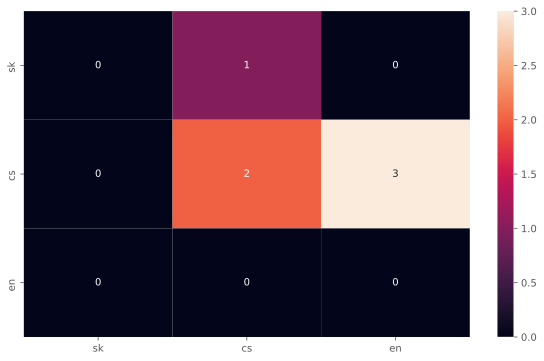

In [ ]:
cm = confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])
index = ['sk', 'cs', 'en']
columns = ['sk', 'cs', 'en']
cm_df = pd.DataFrame(cm, columns, index)
plt.figure(figsize=(10,6))  
sns.heatmap(cm_df, annot=True)

In [ ]:
f1_score(y_val, predictions, average = 'weighted')

0.4166666666666667

In [ ]:
naive_classifier = MultinomialNB(alpha = 0.0001, fit_prior = False)
naive_classifier.fit(X_train, y_train)
predictions = naive_classifier.predict(X_val)
confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])
f1_score(y_val, predictions, average = 'weighted')

0.4166666666666667

In [ ]:
import re, collections
def get_stats(vocab):
  pairs = collections.defaultdict(int)
  for word, freq in vocab.items():
    symbols = word.split()
    for i in range(len(symbols)-1):
      pairs[symbols[i], symbols[i+1]] += freq
  return pairs

In [ ]:
def merge_vocab(pair, v_in):
  v_out = {}
  bigram = re.escape(' '.join(pair))
  p = re.compile(r'(?<!\S)' + bigram + r'(?!\S)')
  for word in v_in:
    w_out = p.sub(''.join(pair), word)
    v_out[w_out] = v_in[word]
  return v_out

In [ ]:
def get_vocab(data):
  words = []
  for sentence in data:
    words.extend(sentence.split())
  vocab = defaultdict(int)
  for word in words:
    vocab[' '.join(word)] += 1
  return vocab

In [ ]:
vocab = get_vocab(sentences_train)
for i in range(100):
  pairs = get_stats(vocab)
  best = max(pairs, key = pairs.get)
  vocab = merge_vocab(best, vocab)

In [ ]:
merges = defaultdict(int)
for k, v in vocab.items():
  for subword in k.split():
    if len(subword) >= 2:
      merges[subword] += v

In [ ]:
merge_ordered = sorted(merges, key = merges.get, reverse = True)

In [ ]:
pkl.dump(merge_ordered, open('merge_ordered.pkl', 'wb'))

In [ ]:
def split_into_subwords(text):
  merges = pkl.load(open('merge_ordered.pkl', 'rb'))
  subwords = []
  for word in text.split():
    for subword in merges:
      subword_count = word.count(subword)
      if subword_count > 0:
        word = word.replace(subword, ' ')
        subwords.extend([subword]*subword_count)
  return ' '.join(subwords)

In [ ]:
split_into_subwords('hello my name is ari')

'lo na ri'

In [ ]:
data_preprocessed_subwords = {k : [split_into_subwords(sentence) for sentence in v] for k, v in data_preprocessed.items()}

In [ ]:
show_statistics(data_preprocessed_subwords)

Language : sk
-----------------------
Number of Sentences	:	 1
Number of words		:	 118
Number of Unique Words	:	 45
Number of Sample Extract	:	 no ue ud ia to vi ia.......

Language : cs
-----------------------
Number of Sentences	:	 1
Number of words		:	 123
Number of Unique Words	:	 39
Number of Sample Extract	:	 ub ã­ ã­ ch ps ch ob.......

Language : en
-----------------------
Number of Sentences	:	 1
Number of words		:	 89
Number of Unique Words	:	 35
Number of Sample Extract	:	 le hi si la in the ho.......



In [ ]:
data_train_subwords = []

for sentence in sentences_train:
  data_train_subwords.append(split_into_subwords(sentence))

data_val_subwords = []

for sentence in sentences_val:
  data_val_subwords.append(split_into_subwords(sentence))

In [ ]:
vectorizer = CountVectorizer()

In [ ]:
X_train = vectorizer.fit_transform(data_train_subwords)
X_val = vectorizer.transform(data_val_subwords)


In [ ]:
naive_classifier = MultinomialNB(alpha = 1.0, fit_prior = False)
naive_classifier.fit(X_train, y_train)
predictions = naive_classifier.predict(X_val)
confusion_matrix(y_val, predictions, ['sk', 'cs', 'en'])
f1_score(y_val, predictions, average = 'weighted')

0.6428571428571429

In [ ]:
joblib.dump(naive_classifier, 'final_model1.joblib')

['final_model1.joblib']

In [ ]:
joblib.dump(vectorizer, 'final_model2.joblib')


['final_model2.joblib']

In [ ]:
model = joblib.load('final_model1.joblib')
vectorizer = joblib.load('final_model2.joblib')

text = 'I am Vipul'
text = preprocess(text)
text = [split_into_subwords(text)]
text_vectorized = vectorizer.transform(text)
model.predict(text_vectorized)

array(['sk'], dtype='<U2')